In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
from collections import Counter
import seaborn as sns
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [533]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
#data.shape
#data.head()
#data.tail(15)

In [ ]:
#data.describe()

In [ ]:
print(data['Gender'].unique()) 
print(data['family_history_with_overweight'].unique())
print(data['FAVC'].unique()) 
print(data['CAEC'].unique())
print(data['SMOKE'].unique()) 
print(data['SCC'].unique()) 
print(data['CALC'].unique())
print(data['MTRANS'].unique()) 

In [534]:
new_data = data.drop_duplicates()

In [ ]:
#types = new_data.dtypes
#print(types)
#print(new_data.NObeyesdad.unique())

In [ ]:
import matplotlib as plt
new_data.hist()
plt.pyplot.show()

In [ ]:
new_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.pyplot.show()

In [ ]:
new_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.pyplot.show()

In [535]:
new_data['Age'] = np.log(new_data['Age'])
new_data['NCP'] = np.log(new_data['NCP'])
new_data['FCVC'] = np.log(new_data['FCVC'])
new_data['Weight'] = np.log(new_data['Weight'])

C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_580292\3970796362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Age'] = np.log(new_data['Age'])
C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_580292\3970796362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['NCP'] = np.log(new_data['NCP'])
C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_580292\3970796362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [536]:
new_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,3.044522,1.62,4.158883,yes,no,0.693147,1.098612,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,3.044522,1.52,4.025352,yes,no,1.098612,1.098612,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,3.135494,1.80,4.343805,yes,no,0.693147,1.098612,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,3.295837,1.80,4.465908,no,no,1.098612,1.098612,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,3.091042,1.78,4.497585,no,no,0.693147,0.000000,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         16.8%
Obesity_Type_III       15.5%
Obesity_Type_II        14.2%
Overweight_Level_II    13.9%
Normal_Weight          13.5%
Overweight_Level_I     13.2%
Insufficient_Weight    12.8%
Name: proportion, dtype: object


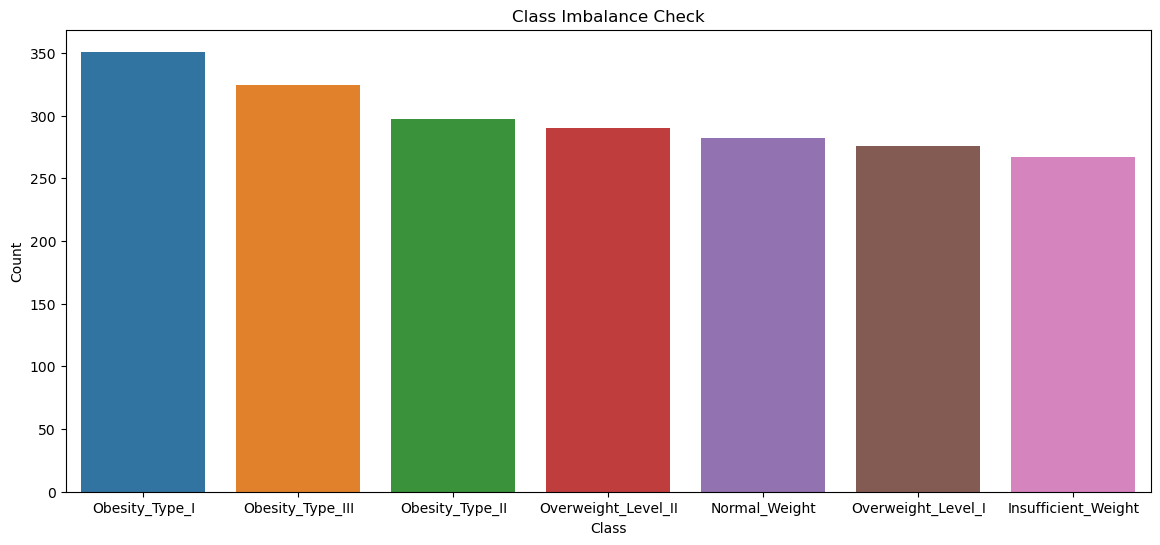

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking if the dataset has a balance class
class_counts = new_data['NObeyesdad'].value_counts()
perc_class_counts = new_data.NObeyesdad.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(class_counts)
print(perc_class_counts)

# Create bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Class Imbalance Check')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [538]:
#Label econding
cat_var = new_data.select_dtypes(include = 'object').columns
print(cat_var)
new_data[cat_var] = new_data[cat_var].apply(lambda x: pd.factorize(x)[0])

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_580292\300157150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[cat_var] = new_data[cat_var].apply(lambda x: pd.factorize(x)[0])


In [539]:
#new_data = new_data.drop(columns = ['NCP'])
new_data = new_data.drop(columns = ['Weight'])
#new_data = new_data.drop(columns = ['Age'])
#new_data = new_data.drop(columns = ['Height'])
#new_data = new_data.drop(columns = ['Gender'])
#new_data = new_data.drop(columns = ['family_history_with_overweight'])
#new_data = new_data.drop(columns = ['FAVC'])
#new_data = new_data.drop(columns = ['FCVC'])
#new_data = new_data.drop(columns = ['CAEC'])
#new_data = new_data.drop(columns = ['SMOKE'])
#new_data = new_data.drop(columns = ['CH2O'])
#new_data = new_data.drop(columns = ['SCC'])
#new_data = new_data.drop(columns = ['FAF'])
#new_data = new_data.drop(columns = ['TUE'])
#new_data = new_data.drop(columns = ['CALC'])
#new_data = new_data.drop(columns = ['MTRANS'])

In [540]:
new_data.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,3.044522,1.62,0,0,0.693147,1.098612,0,0,2.0,0,0.0,1.0,0,0,0
1,0,3.044522,1.52,0,0,1.098612,1.098612,0,1,3.0,1,3.0,0.0,1,0,0
2,1,3.135494,1.80,0,0,0.693147,1.098612,0,0,2.0,0,2.0,1.0,2,0,0
3,1,3.295837,1.80,1,0,1.098612,1.098612,0,0,2.0,0,2.0,0.0,2,1,1
4,1,3.091042,1.78,1,0,0.693147,0.000000,0,0,2.0,0,0.0,0.0,1,0,2


In [541]:
# Seperate input and output features
X = new_data.drop(columns = ['NObeyesdad'])
Y = new_data.NObeyesdad

In [542]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data = scaled_features)
scaled_features.columns = X.columns
X = scaled_features

In [543]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [544]:
def check_scores(B,algo):
    cm = B
    n_classes = cm.shape[0]
    specificities = []
    Recalls = []
    Precisions = []
    F1s = []
    # Initialize arrays to store metrics
    true_positives = np.zeros(n_classes)
    false_positives = np.zeros(n_classes)
    false_negatives = np.zeros(n_classes)
    true_negatives = np.zeros(n_classes)

    for i in range(n_classes):
        # True Positive (TP) is the diagonal element
        true_positives[i] = cm[i, i]

        # False Positive (FP) is the sum of the row, excluding the diagonal element
        false_positives[i] = np.sum(cm[:, i]) - true_positives[i]

        # False Negative (FN) is the sum of the column, excluding the diagonal element
        false_negatives[i] = np.sum(cm[i, :]) - true_positives[i]

        # True Negative (TN) is the sum of all elements, excluding the row and column corresponding to the class
        true_negatives[i] = np.sum(cm) - (false_negatives[i] + false_positives[i] + true_positives[i])
    
        specificity = true_negatives[i] / (true_negatives[i] + false_positives[i])
        recall = true_positives[i]/(true_positives[i]+false_negatives[i])
        precision = true_positives[i]/(true_positives[i]+false_positives[i])
        F1 = 2/((1/recall)+(1/precision))
    
        specificities.append(round(specificity,2))
        Recalls.append(round(recall,2))
        Precisions.append(round(precision,2))
        F1s.append(round(F1,2))


    weighted_avg_recalls = sum(Recalls) / len(Recalls)
    weighted_avg_precision = sum(Precisions) / len(Precisions)
    weighted_avg_f1 = sum(F1s) / len(F1s)
    weighted_avg_specificity = sum(specificities) / len(specificities)
    print("True Positives:", true_positives)
    print("False Positives:", false_positives)
    print("False Negatives:", false_negatives)
    print("True Negatives:", true_negatives)
    print('Specificity of ',algo,' : ',specificities)
    print('Average Specificity of ',algo,' : ', round(weighted_avg_specificity,2))
    print('Recall of ',algo,' : ',Recalls)
    print('Average Recall of ',algo,' : ', round(weighted_avg_recalls,2))
    print('F1 Score of ',algo,' : ', F1s)
    print('Average F1 of ',algo,' : ', round(weighted_avg_f1,2))
    print('Precision of ',algo,' : ',Precisions)
    print('Average Precision of ',algo,' : ', round(weighted_avg_precision,2))

KNN

[1.0, 0.9304973037747154, 0.89035350509287, 0.8849610545236669, 0.8550029958058718, 0.8460155781905333, 0.8292390653085681, 0.8244457759137208, 0.8040742959856201]
[0.8133971291866029, 0.8086124401913876, 0.7966507177033493, 0.8110047846889952, 0.8014354066985646, 0.7942583732057417, 0.7918660287081339, 0.7703349282296651, 0.7679425837320574]


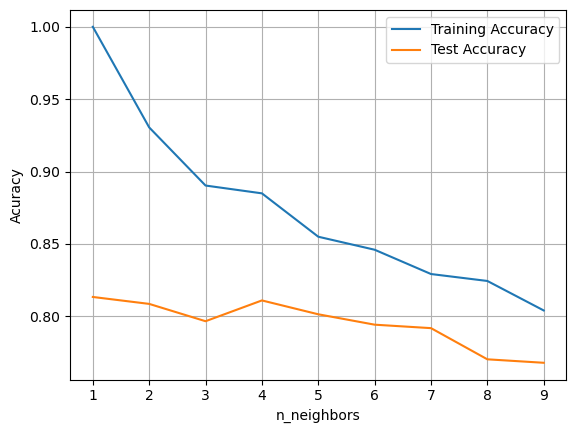

In [545]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
training_accuracy = []
test_accuracy = []

settings = range(1,10)
for n in settings:
    
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    
    #append training and generalisation accuracy
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

plt.plot(settings, training_accuracy, label = 'Training Accuracy')
plt.plot(settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()

print(training_accuracy)
print(test_accuracy)

In [546]:
import sklearn.neighbors as ne
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# KNN classifier on original data
KNN=ne.KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
ACC_train=KNN.score(X_train,Y_train)
ACC_test=KNN.score(X_test,Y_test)
print('Train Accuracy=', ACC_train)
print('Test Accuracy=', ACC_test)

predicted = KNN.predict(X_test)
cm = confusion_matrix(Y_test, predicted)
print(cm)
cm.ravel()

Train Accuracy= 0.8550029958058718
Test Accuracy= 0.8014354066985646
[[25  5  6  8 14  3  0]
 [ 6 40  2  5  1  1  0]
 [ 0  2 39  4  1  3  0]
 [ 0  2  2 61  2  2  1]
 [ 5  1  2  2 49  0  0]
 [ 0  1  2  0  0 61  0]
 [ 0  0  0  0  0  0 60]]


array([25,  5,  6,  8, 14,  3,  0,  6, 40,  2,  5,  1,  1,  0,  0,  2, 39,
        4,  1,  3,  0,  0,  2,  2, 61,  2,  2,  1,  5,  1,  2,  2, 49,  0,
        0,  0,  1,  2,  0,  0, 61,  0,  0,  0,  0,  0,  0,  0, 60],
      dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

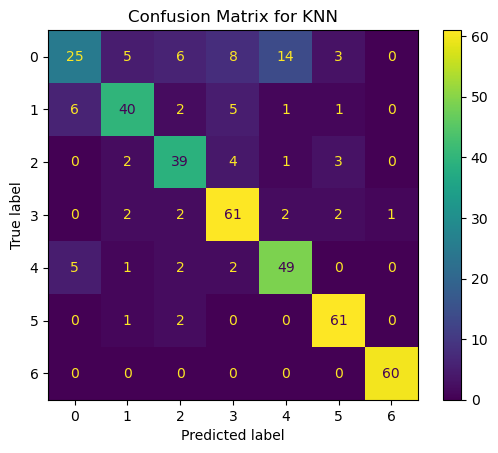

In [547]:
disp = ConfusionMatrixDisplay.from_estimator(KNN,X_test,Y_test,display_labels = Y.unique())
plt.title("Confusion Matrix for KNN")
plt.show

In [548]:
check_scores(cm,'KNN')

True Positives: [25. 40. 39. 61. 49. 61. 60.]
False Positives: [11. 11. 14. 19. 18.  9.  1.]
False Negatives: [36. 15. 10.  9. 10.  3.  0.]
True Negatives: [346. 352. 355. 329. 341. 345. 357.]
Specificity of  KNN  :  [0.97, 0.97, 0.96, 0.95, 0.95, 0.97, 1.0]
Average Specificity of  KNN  :  0.97
Recall of  KNN  :  [0.41, 0.73, 0.8, 0.87, 0.83, 0.95, 1.0]
Average Recall of  KNN  :  0.8
F1 Score of  KNN  :  [0.52, 0.75, 0.76, 0.81, 0.78, 0.91, 0.99]
Average F1 of  KNN  :  0.79
Precision of  KNN  :  [0.69, 0.78, 0.74, 0.76, 0.73, 0.87, 0.98]
Average Precision of  KNN  :  0.79


[0.7009569377990431, 0.7081339712918661, 0.7631578947368421, 0.7918660287081339, 0.8038277511961722, 0.8277511961722488]
[0.8999400838825644, 0.8981426003594967, 0.9676452965847813, 0.9766327142001199, 0.9898142600359496, 0.9952067106051528]


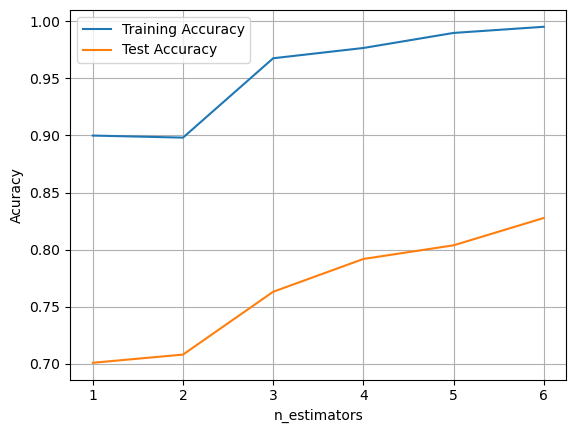

In [494]:
from sklearn.ensemble import RandomForestClassifier
  
training_accuracy = []
test_accuracy = []

estimators_settings = range(1,7)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    forest.fit(X_train, Y_train)
    
    #record the training and test set accuracy
    training_accuracy.append(forest.score(X_train, Y_train))
    test_accuracy.append(forest.score(X_test, Y_test))

plt.plot(estimators_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

print(test_accuracy)
print(training_accuracy)

In [553]:
# Random Forest classifier
forest = RandomForestClassifier(n_estimators=6, max_features='sqrt', random_state=3)
forest.fit(X_train, Y_train)
ACC_train=forest.score(X_train,Y_train)
ACC_test=forest.score(X_test,Y_test)
print('Train Accuracy=', ACC_train)
print('Test Accuracy=', ACC_test)

predicted = forest.predict(X_test)
cmf = confusion_matrix(Y_test, predicted)
print(cmf)

Train Accuracy= 0.9952067106051528
Test Accuracy= 0.8277511961722488
[[39  8  5  5  2  1  1]
 [ 6 39  2  3  3  2  0]
 [ 5  2 39  1  0  2  0]
 [ 4  1  2 61  0  2  0]
 [ 8  1  0  1 49  0  0]
 [ 1  0  3  1  0 59  0]
 [ 0  0  0  0  0  0 60]]


<function matplotlib.pyplot.show(close=None, block=None)>

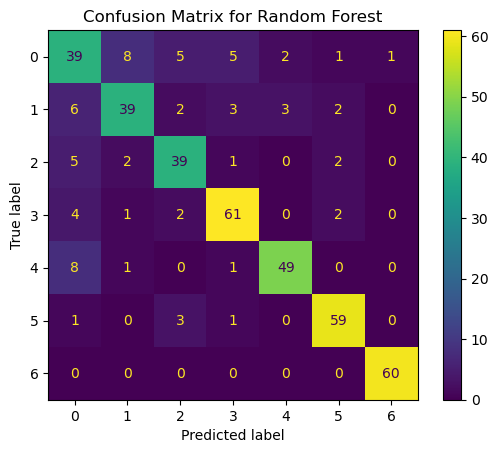

In [554]:
disp = ConfusionMatrixDisplay.from_estimator(forest,X_test,Y_test,display_labels = Y.unique())
plt.title("Confusion Matrix for Random Forest")
plt.show

In [555]:
check_scores(cmf,'Random Forest')

True Positives: [39. 39. 39. 61. 49. 59. 60.]
False Positives: [24. 12. 12. 11.  5.  7.  1.]
False Negatives: [22. 16. 10.  9. 10.  5.  0.]
True Negatives: [333. 351. 357. 337. 354. 347. 357.]
Specificity of  Random Forest  :  [0.93, 0.97, 0.97, 0.97, 0.99, 0.98, 1.0]
Average Specificity of  Random Forest  :  0.97
Recall of  Random Forest  :  [0.64, 0.71, 0.8, 0.87, 0.83, 0.92, 1.0]
Average Recall of  Random Forest  :  0.82
F1 Score of  Random Forest  :  [0.63, 0.74, 0.78, 0.86, 0.87, 0.91, 0.99]
Average F1 of  Random Forest  :  0.83
Precision of  Random Forest  :  [0.62, 0.76, 0.76, 0.85, 0.91, 0.89, 0.98]
Average Precision of  Random Forest  :  0.82


In [556]:
# Decision tree
#Create a Decision Tree classifier with the current max_depth
from sklearn import tree as tr
DT=tr.DecisionTreeClassifier(max_depth=5)
DT.fit(X_train,Y_train)
trACC=DT.score(X_train,Y_train)
tesACC=DT.score(X_test,Y_test)

print(trACC)
print(tesACC)
#model = DT.fit(X_train,Y_train)
#text_representation = tr.export_text(DT)
#print(text_representation)

# To Visualize Decision Tree
#tr.plot_tree(model)

0.6626722588376274
0.6363636363636364


[0.396644697423607, 0.4889155182744158, 0.5680047932893948, 0.6626722588376274, 0.7285799880167765, 0.78070701018574]
[0.39952153110047844, 0.49760765550239233, 0.5669856459330144, 0.6363636363636364, 0.6961722488038278, 0.6818181818181818]


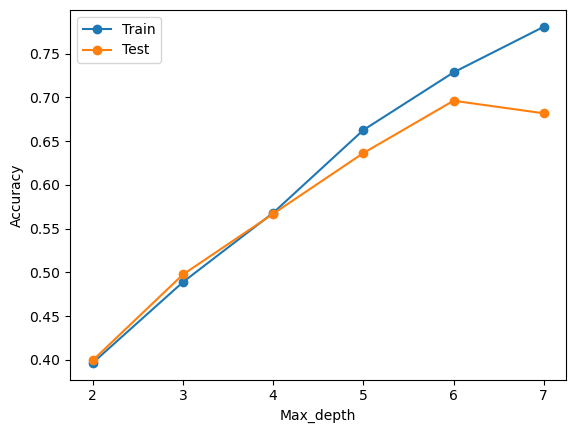

In [557]:
# Decision tree
trACC=[]
tesACC=[]
MD=[]

for i in range(2,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,Y_train)
    trACC.append(DT.score(X_train,Y_train))
    tesACC.append(DT.score(X_test,Y_test))
    MD.append(i)
print(trACC)
print(tesACC)
#print(MD)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#print(trACC)
#print(tesACC)

In [558]:
DT=tr.DecisionTreeClassifier(max_depth=5)
DT.fit(X_train,Y_train)
ACC_train=DT.score(X_train,Y_train)
ACC_test=DT.score(X_test,Y_test)
print('Train Accuracy=', ACC_train)
print('Test Accuracy=', ACC_test)

predicted = DT.predict(X_test)
cmfd = confusion_matrix(Y_test, predicted)
print(cmf)

Train Accuracy= 0.6626722588376274
Test Accuracy= 0.6363636363636364
[[39  8  5  5  2  1  1]
 [ 6 39  2  3  3  2  0]
 [ 5  2 39  1  0  2  0]
 [ 4  1  2 61  0  2  0]
 [ 8  1  0  1 49  0  0]
 [ 1  0  3  1  0 59  0]
 [ 0  0  0  0  0  0 60]]


<function matplotlib.pyplot.show(close=None, block=None)>

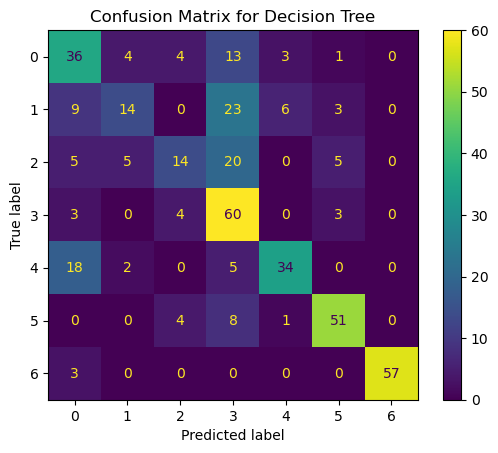

In [559]:
disp = ConfusionMatrixDisplay.from_estimator(DT,X_test,Y_test,display_labels = Y.unique())
plt.title("Confusion Matrix for Decision Tree")
plt.show

In [560]:
check_scores(cmfd,'Decision Trees')

True Positives: [36. 14. 14. 60. 34. 51. 57.]
False Positives: [38. 11. 12. 69. 10. 12.  0.]
False Negatives: [25. 41. 35. 10. 25. 13.  3.]
True Negatives: [319. 352. 357. 279. 349. 342. 358.]
Specificity of  Decision Trees  :  [0.89, 0.97, 0.97, 0.8, 0.97, 0.97, 1.0]
Average Specificity of  Decision Trees  :  0.94
Recall of  Decision Trees  :  [0.59, 0.25, 0.29, 0.86, 0.58, 0.8, 0.95]
Average Recall of  Decision Trees  :  0.62
F1 Score of  Decision Trees  :  [0.53, 0.35, 0.37, 0.6, 0.66, 0.8, 0.97]
Average F1 of  Decision Trees  :  0.61
Precision of  Decision Trees  :  [0.49, 0.56, 0.54, 0.47, 0.77, 0.81, 1.0]
Average Precision of  Decision Trees  :  0.66


In [493]:
from sklearn.model_selection import cross_val_score
import numpy as np
print('Cross Validation scores for Random Forest: ', cross_val_score(RandomForestClassifier(n_estimators=150, max_features='sqrt', random_state=3),X,Y))
RMean_Score = np.mean(cross_val_score(RandomForestClassifier(n_estimators=150, max_features='sqrt', random_state=3),X,Y))
print('Average Random Forest Cross Validation Score', RMean_Score)
print("=================================================================================================")
print('Cross Validation scores for Decision Tree: ', cross_val_score(tr.DecisionTreeClassifier(max_depth=5),X,Y))
DMean_Score = np.mean(cross_val_score(tr.DecisionTreeClassifier(max_depth=13),X,Y))
print('Average Decision Tree Cross Validation Score', DMean_Score)
print("=================================================================================================")
print('Cross Validation scores for KNN', cross_val_score(KNeighborsClassifier(n_neighbors=5),X,Y))
KMean_Score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5),X,Y))
print('Average KNN Cross Validation Score', KMean_Score)

Cross Validation scores for Random Forest:  [0.60047847 0.92344498 0.9352518  0.92326139 0.94724221]
Average Random Forest Cross Validation Score 0.865935768131906
Cross Validation scores for Decision Tree:  [0.51435407 0.66507177 0.64748201 0.64028777 0.71942446]
Average Decision Tree Cross Validation Score 0.7537801337877067
Cross Validation scores for KNN [0.60287081 0.82057416 0.8177458  0.81534772 0.85371703]
Average KNN Cross Validation Score 0.7820511055270616


FEATURE IMPORTANCE

Gender     Score: 0.06880
Age     Score: 0.15420
Height     Score: 0.11590
family_history_with_overweight     Score: 0.04613
FAVC     Score: 0.02150
FCVC     Score: 0.11867
NCP     Score: 0.07482
CAEC     Score: 0.04040
SMOKE     Score: 0.00328
CH2O     Score: 0.07515
SCC     Score: 0.00730
FAF     Score: 0.09687
TUE     Score: 0.09719
CALC     Score: 0.04308
MTRANS     Score: 0.03671


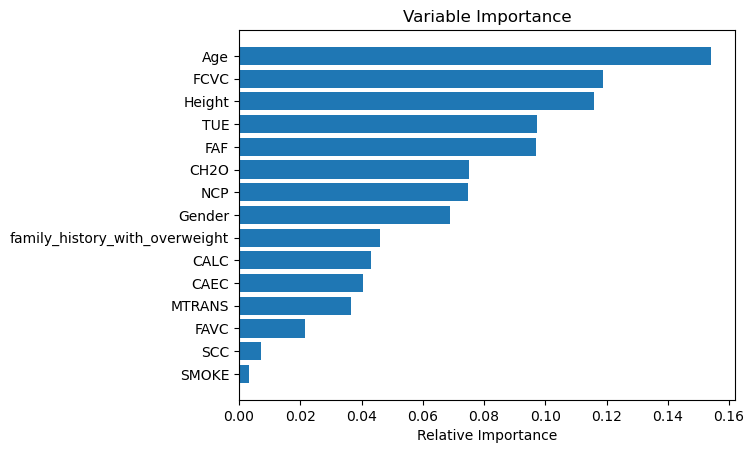